In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder,Imputer
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [146]:
br=pd.read_csv('brain_size.csv',sep=';')
size=pd.DataFrame(br)
size.head()

,id,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118,64.5,816932
1,2,Male,140,150,124,132,72.5,1001121
2,3,Male,139,123,150,143,73.3,1038437
3,4,Male,133,129,128,172,68.8,965353
4,5,Female,137,132,134,147,65.0,951545


In [147]:
size.isnull().sum()

id           0
Gender       0
FSIQ         0
VIQ          0
PIQ          0
Weight       0
Height       0
MRI_Count    0
dtype: int64

In [148]:
size.drop(20,inplace=True)

In [149]:
size[['Height','Weight']] = size[['Height','Weight']].apply(pd.to_numeric)

In [150]:
size.dtypes

id             int64
Gender        object
FSIQ           int64
VIQ            int64
PIQ            int64
Weight         int64
Height       float64
MRI_Count      int64
dtype: object

In [151]:
le=LabelEncoder()
size['Gender']=le.fit_transform(size['Gender'].astype(str))

In [152]:
size.drop(["id"],axis=1,inplace=True)

In [153]:
size.head(2)

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,0,133,132,124,118,64.5,816932
1,1,140,150,124,132,72.5,1001121


In [154]:
size.describe()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,3.900000e+01
mean,0.487179,114.230769,113.102564,111.666667,150.564103,68.525641,9.091738e+05
std,0.506370,23.878488,23.433888,22.390474,23.367538,3.994649,7.317776e+04
min,0.000000,77.000000,71.000000,72.000000,106.000000,62.000000,7.906190e+05
25%,0.000000,90.500000,90.500000,89.500000,134.500000,66.000000,8.553650e+05
50%,0.000000,130.000000,114.000000,120.000000,146.000000,68.000000,9.059400e+05
75%,1.000000,136.000000,130.500000,128.000000,172.000000,70.500000,9.505670e+05
max,1.000000,144.000000,150.000000,150.000000,192.000000,77.000000,1.079549e+06


In [155]:
from scipy.stats import boxcox
size['MRI_Count']=boxcox(size['MRI_Count'],0)

In [156]:
size.shape

(39, 7)

Gender           AxesSubplot(0.125,0.71587;0.352273x0.16413)
FSIQ          AxesSubplot(0.547727,0.71587;0.352273x0.16413)
VIQ             AxesSubplot(0.125,0.518913;0.352273x0.16413)
PIQ          AxesSubplot(0.547727,0.518913;0.352273x0.16413)
Weight          AxesSubplot(0.125,0.321957;0.352273x0.16413)
Height       AxesSubplot(0.547727,0.321957;0.352273x0.16413)
MRI_Count          AxesSubplot(0.125,0.125;0.352273x0.16413)
dtype: object

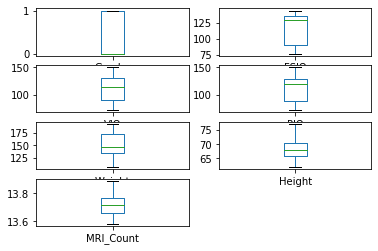

In [157]:
size.plot(kind='box',subplots=True,layout=(4,2))

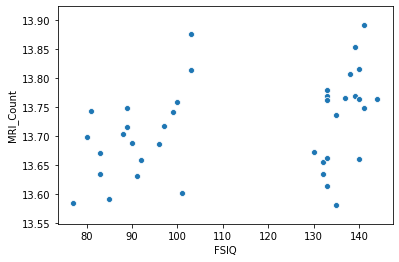

In [158]:
sns.scatterplot(x='FSIQ',y='MRI_Count',data=size)

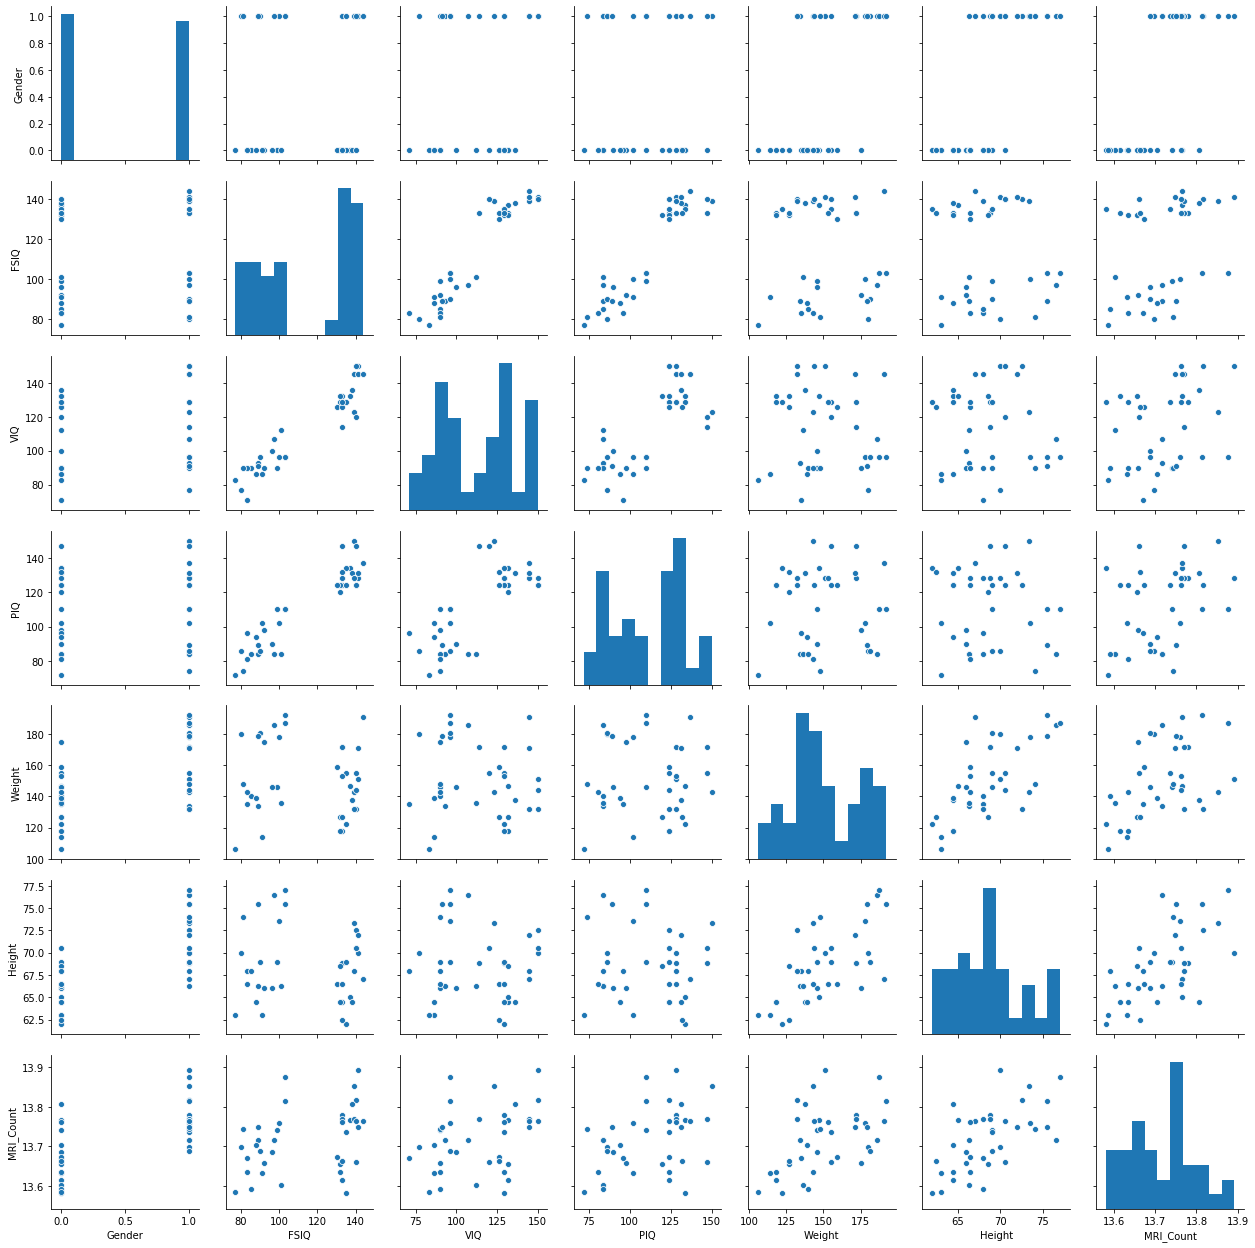

In [159]:
sns.pairplot(size)

In [160]:
x=size.iloc[:,:-1]
y=size.iloc[:,-1]

In [161]:
y.shape

(39,)

In [162]:
def random(alg,x,y):
    r_score=0
    for r_state in range(43,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_state)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        r2scr=r2_score(y_test,pred)
        if r2scr > r_score:
            r_score= r2scr
            final_r=r_state
    print(r_score,'at',final_r)

In [163]:
def metrics(y_test,pred):
    print('mean_squared_error=',mean_squared_error(y_test,pred))
    print('mean_absolute_error=',mean_absolute_error(y_test,pred))
    print('r2score=',r2_score(y_test,pred))

In [164]:
def cross_val(alg):
    score=cross_val_score(alg,x,y,cv=5)
    print(score)
    print(score.mean())
    print(score.std())

In [166]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
lr=LinearRegression()
random(lr,x,y)

0.7501934011544115 at 51


In [167]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=51)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
metrics(y_test,pred)

mean_squared_error= 0.001864159539125493
mean_absolute_error= 0.03125269195171262
r2score= 0.7501934011544115


In [168]:
cross_val(lr)

[0.28804664 0.08560993 0.4669534  0.71115467 0.01757666]
0.31386826078885866
0.2537041152387749


In [169]:
l=Lasso()
alphavalue={'alpha':[1,0.1,0.01,0.001,0]}
gr=GridSearchCV(estimator=l,param_grid=alphavalue)
gr.fit(x_train,y_train)
gr.best_params_

{'alpha': 0.01}

In [170]:
ls=Lasso(alpha=0.01)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.523514420696277

In [171]:
r=Ridge()
alphavalue={'alpha':[1,0.1,0.01,0.001,0]}
grd=GridSearchCV(estimator=r,param_grid=alphavalue)
grd.fit(x_train,y_train)
grd.best_params_

{'alpha': 1}

In [172]:
rd=Ridge(alpha=1)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.5813183135003142

In [174]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
random(dtr,x,y)

0.6255181819960095 at 51


In [175]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=96)
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
metrics(y_test,pred)

mean_squared_error= 0.004012122894421737
mean_absolute_error= 0.052614403757675524
r2score= 0.48710646366230004


In [176]:
cross_val(dtr)

[ 0.38135948  0.19907797 -0.25718732  0.00400136 -1.29682402]
-0.19391450526118578
0.5907565984863324


In [177]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
random(knr,x,y)

0.5102691623817452 at 58


In [178]:
parameters={'n_neighbors':range(1,10)}
grid=GridSearchCV(knr,parameters)
grid.fit(x_train,y_train)
grid.best_params_

{'n_neighbors': 9}

In [179]:
knr=KNeighborsRegressor(n_neighbors=9)
knr.fit(x_train,y_train)
pred=knr.predict(x_test)
metrics(y_test,pred)

mean_squared_error= 0.005891789104760776
mean_absolute_error= 0.06451233366100859
r2score= 0.24681755050471288


In [180]:
cross_val(knr)

[-0.30441554  0.29934238 -0.19911389  0.16299892  0.14820872]
0.021404117356121844
0.2315879154764548


In [181]:
from sklearn.svm import SVR
svm=SVR()

In [186]:
random(svm,x,y)

0.6444906992983284 at 96


In [183]:
parameters={'kernel':['rbf','linear'],'C':[1,10,100]}
grid=GridSearchCV(svm,parameters)
grid.fit(x_train,y_train)
grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [185]:
svm=SVR(kernel="linear")
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=96)
svm.fit(x_train,y_train)
pred=svm.predict(x_test)
metrics(y_test,pred)

mean_squared_error= 0.002780980658695417
mean_absolute_error= 0.039922209461912286
r2score= 0.6444906992983284


In [187]:
cross_val(svm)

[ 0.0351438   0.11399546 -0.16568616  0.48280478 -0.21779072]
0.04969343260703708
0.24894498209755087


In [188]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmodel=kmeans.fit(x)

In [189]:
kmodel.labels_

array([0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 2, 2, 0,
       0, 1, 0, 1, 2, 1, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 2])

In [190]:
kmodel.cluster_centers_

array([[5.00000000e-01, 1.36400000e+02, 1.33550000e+02, 1.30950000e+02,
        1.46350000e+02, 6.77450000e+01],
       [1.81818182e-01, 8.84545455e+01, 9.00909091e+01, 8.82727273e+01,
        1.35181818e+02, 6.67818182e+01],
       [8.75000000e-01, 9.42500000e+01, 9.36250000e+01, 9.56250000e+01,
        1.82250000e+02, 7.28750000e+01]])

In [191]:
from sklearn.metrics import homogeneity_score
print(homogeneity_score(kmodel.labels_,y))

1.0000000000000004


From the above analysis Linear Regression(0.75 at random_state=51) and K-Means Cluster(3) have good score ammomg all

In [192]:
from sklearn.externals import joblib
joblib.dump(lr,'brainsize.pkl')

['brainsize.pkl']